In [23]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_axes_aligner import align
import newfig_utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
plt.rcParams['axes.facecolor'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 2.0

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [25]:
### Mi1 dataset
filename = 'data/Mi1_MeanSEM.mat'
data = scipy.io.loadmat(filename)  #4 speed. direction doesn't matter. so only 90 degrees direction
arclight = data['Arcmean'][:105,:]
arclight_sem = data['ArcSE'][:105,:]
gcamp = data['Gmean'][:105,:]
gcamp_sem = data['GSE'][:105,:]

In [26]:
Mi1Ca_Lmodel = np.load('data/modeldata/Mi1Ca_Lmodel.npy')
Mi1Ca_Lmodel = Mi1Ca_Lmodel[:105,:]/100.0
MiCa_Lmodel_sem = np.zeros_like(Mi1Ca_Lmodel)
Mi1Ca_Lmodel.shape 

(105, 4)

In [9]:
arclight.shape, gcamp.shape, arclight_sem.shape

((105, 4), (105, 4), (105, 4))

In [11]:
def plot_Mi1Tm3signals(data_list, sem_list , myylim, upperm, mytitle, myxlabel, xticklabel,c):
    xsize = 0.15
    ysize = 0.10
    xoffs = 0.167
    yoffs = 0.15
    leftm = 0.08
    
    dt = 1/13.0
    x_values = np.arange(data_list[0].shape[0])*dt  #changing x-axis to time. multiply with time step dt = 1/frequency
    count = 0 #count for stimuli
    
    for i in range(4):
        utils.setmyaxes(i*xoffs+leftm, upperm, xsize, ysize, myylim[0])
        plt.xticks(np.arange(0,10.0,4.0))
        ydata = data_list[0][:,count]
        semdata = sem_list[0][:,count]
        utils.plot_timedata(x_values, ydata,semdata, c[0], 'Arclight')
        plt.margins(0)
        ax = plt.gca()
        ax.set_ylim(myylim[0])
        ax.set_yticks(np.arange(myylim[0][0],myylim[0][1]-myylim[0][0],-myylim[0][0]))
        if i!=0: ax.set_yticklabels([])
        ax.set_title(mytitle[i], fontsize=10)
        if i==3 : ax.legend(loc=1, frameon=False, prop={'size':8})
            
        ax2 = ax.twinx()
        ax2.set_ylim(myylim[1])
        ax2.set_yticks(np.arange(myylim[1][0],myylim[1][1]-myylim[1][0],-myylim[1][0]))
        plt.sca(ax2)
        utils.plot_timedata(x_values, data_list[1][:,count], sem_list[1][:,count],c[1], 'GCaMP' )
        
        org1=0.0
        org2=0.0
        pos=0.25
        align.yaxes(ax, org1, ax2, org2, pos)
        plt.margins(0)
        ax2.spines['right'].set_color('red')
        ax2.tick_params(axis='y', colors='red')
        ax2.tick_params(pad=2)
        if i!=3: ax2.set_yticklabels([])
        if i==3: ax2.legend(loc=1,bbox_to_anchor=(0,0,1,0.85),frameon=False, prop={'size':8})
        count = count + 1
            
    # peak dF/F
    peak_tuning = utils.cal_peaktuning(data_list,ncol=4)
    utils.setmyaxes(4.47*xoffs+leftm, upperm,xsize,ysize,(0,myylim[0][1]))
    utils.plot_data(peak_tuning[0][0:4],'k','Arclight')
    plt.title(r'Peak $\Delta$F/F')
    plt.xlabel(myxlabel)
    plt.legend(loc=3,frameon=False, prop={'size':8})
    ax = plt.gca()
    ax2= ax.twinx()
    ax2.set_ylim((0,myylim[1][1]))
    plt.sca(ax2)
    utils.plot_data(peak_tuning[1][0:4],'r','GCaMP')
    ax2.spines['right'].set_color('red')
    ax2.tick_params(axis='y', colors='red')
    plt.legend(loc=3,bbox_to_anchor=(0,0.15,1,0.0),frameon=False, prop={'size':8})
        
    plt.xticks(range(0,4),xticklabel)
            
        
        
        

In [45]:
def plot_modelsignals(data_list, sem_list , myylim, upperm, mytitle, myxlabel, xticklabel,c):
    xsize = 0.15
    ysize = 0.10
    xoffs = 0.167
    yoffs = 0.15
    leftm = 0.08
    
    dt = 1/13.0
    x_values = np.arange(data_list[0].shape[0])*dt  #changing x-axis to time. multiply with time step dt = 1/frequency
    count = 0 #count for stimuli
    
    for i in range(4):
        utils.setmyaxes(i*xoffs+leftm, upperm, xsize, ysize, myylim[0])
        plt.xticks(np.arange(0,10.0,4.0))
        ydata = data_list[0][:,count]
        semdata = sem_list[0][:,count]
        utils.plot_timedata(x_values, ydata,semdata, c[0], 'GCaMP')
        plt.margins(0)
        ax = plt.gca()
        ax.set_ylim(myylim[0])
        ax.set_yticks(np.arange(myylim[0][0],myylim[0][1]-myylim[0][0],-myylim[0][0]))
        if i!=0: ax.set_yticklabels([])
        ax.set_title(mytitle[i], fontsize=10)
        if i==3 : ax.legend(loc=1, frameon=False, prop={'size':8})
            
        utils.plot_timedata(x_values, data_list[1][:,count], sem_list[1][:,count],c[1], 'LModel' )
        if i==3 : ax.legend(loc=1, frameon=False, prop={'size':8})
        count = count + 1
            
    # peak dF/F
    peak_tuning = utils.cal_peaktuning(data_list,ncol=4)
    utils.setmyaxes(4.47*xoffs+leftm, upperm,xsize,ysize,(0,myylim[0][1]))
    utils.plot_data(peak_tuning[0][0:4],'r','GCaMP')
    plt.title(r'Peak $\Delta$F/F')
    plt.xlabel(myxlabel)
    #plt.legend(loc=3,frameon=False, prop={'size':8})
    ax = plt.gca()

    utils.plot_data(peak_tuning[1][0:4],'g','LModel')
    plt.legend(loc=1,frameon=False, prop={'size':8})
        
    plt.xticks(range(0,4),xticklabel)
            
        
        
        

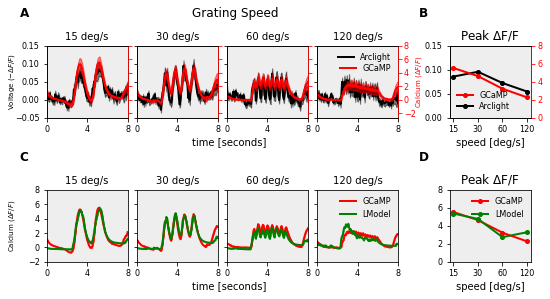

In [49]:
def plot_fig7():
    
    f = plt.figure(figsize=(7.5,10))
    
    axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
    xlabel = 'speed [deg/s]'
    xticklabel = [15,30,60,120]
    plot_Mi1Tm3signals([arclight, gcamp], [arclight_sem, gcamp_sem],[(-0.05,0.15),(-2.0,8.0)],0.8,axis_title,xlabel,xticklabel,c=['k','r'])
    plot_modelsignals([gcamp,Mi1Ca_Lmodel], [arclight_sem, MiCa_Lmodel_sem],[(-2.0,8.0)],0.6,axis_title,xlabel,xticklabel,c=['r','g'])
    
    #utils.plot_signals([T4_arclight_gratings_mean, T4_gcamp_gratings_mean],
    #             [T4_arclight_gratings_sem, T4_gcamp_gratings_sem],[(-0.05,0.15),(-1.0,3.0)],0.85, axis_title,xlabel,xticklabel,c=['k','r'])
    #utils.plot_signals([T4_arclight_edge_mean, T4_gcamp_edge_mean],
    #             [T4_arclight_edge_sem, T4_gcamp_edge_sem],[(-0.05,0.15),(-2.0,6.00)],0.50, axis_title,xlabel,xticklabel,c=['k','r'])
    #data = [[T4_arclight_gratings_mean, T4_gcamp_gratings_mean], [T4_arclight_edge_mean, T4_gcamp_edge_mean]]
    #utils.plot_DSI(data, 'speed [deg/s]',xticklabel)
    
    f.text(0.35,0.94,'Grating Speed',fontsize=12)
    #f.text(0.35,0.63,'Edge Speed',fontsize=12)
    f.text(0.35,0.762,'time [seconds]')
    f.text(0.35,0.562,'time [seconds]')
    #f.text(0.35,0.313,'time [seconds]')
    f.text(0.03,0.94,'A',weight='bold',fontsize=12)
    f.text(0.77,0.94,'B',weight='bold',fontsize=12)
    f.text(0.03,0.74,'C',weight='bold',fontsize=12)
    f.text(0.77,0.74,'D',weight='bold',fontsize=12)
#     f.text(0.03,0.63,'C',weight='bold',fontsize=12)
#     f.text(0.77,0.63,'D',weight='bold',fontsize=12)
#     f.text(0.165,0.27,'E',weight='bold',fontsize=12)
#     f.text(0.515,0.27,'F',weight='bold',fontsize=12)
    f.text(0.007, 0.85, r'Voltage $(-\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    f.text(0.76, 0.85, r'Calcium $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    f.text(0.007, 0.65, r'Calcium $(\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
#     f.text(0.007, 0.482, r'Voltage response $(-\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
#     f.text(0.76, 0.482, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    
    
    plt.savefig('figures/new_figures/figure7.pdf',dpi=1000)
    
plot_fig7()